<a href="https://colab.research.google.com/github/TatyanaFilimonova/CM/blob/main/k-means_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

У реальному світі дані не завжди мають цільову змінну. Для аналізу таких даних використовують алгоритми навчання без учителя, зокрема кластерний аналіз.

**Навчання без учителя:** Тип машинного навчання, де алгоритми навчаються на немаркованих даних для виявлення прихованих структур та закономірностей.

**Кластеризація:** Процес розбиття набору даних на групи (кластери) таким чином, щоб об'єкти в межах одного кластера були більш схожими один на одного, ніж на об'єкти з інших кластерів. Іншими словами, мета - знайти приховану структуру в немаркованих даних, групуючи подібні об'єкти разом.

**Застосування кластеризації**

Кластеризація має широкий спектр застосувань у різних галузях (деякі з них):
- *Маркетинг*:
 - Сегментація ринку: Розподіл споживачів на групи з подібними характеристиками (демографічні дані, купівельна поведінка, інтереси) для розробки цільових маркетингових кампаній.
 - Аналіз кошика покупців: Виявлення товарів, які часто купуються разом, що дозволяє оптимізувати розташування товарів у магазині та пропонувати супутні товари.
- *Соціальні мережі*:
 - Рекомендації друзів: Пропозиція користувачам нових друзів на основі аналізу їх соціальних зв'язків та інтересів.
 - Рекомендації контенту: Персоналізована рекомендація контенту (статті, відео, музика) на основі вподобань користувача та історії його активності.
- *Медицина*:
 - Виявлення хворих ділянок на зображеннях: Автоматизація аналізу медичних зображень (рентгенівські знімки, МРТ, КТ) для виявлення пухлин, запалень та інших патологій.
- *Безпека*:
 - Виявлення аномалій: Ідентифікація незвичайної поведінки в системах безпеки, фінансових транзакціях, мережевому трафіку для виявлення та запобігання шахрайству та атакам.
- Спрощення роботи з великими наборами даних: Кластеризація може допомогти зменшити розмірність даних шляхом групування подібних об'єктів, що спрощує подальший аналіз та обробку даних.

In [ ]:
from warnings import simplefilter
simplefilter(action="ignore", category=FutureWarning)

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

n_samples = 500
X, y = make_blobs(n_samples=300, random_state=170)

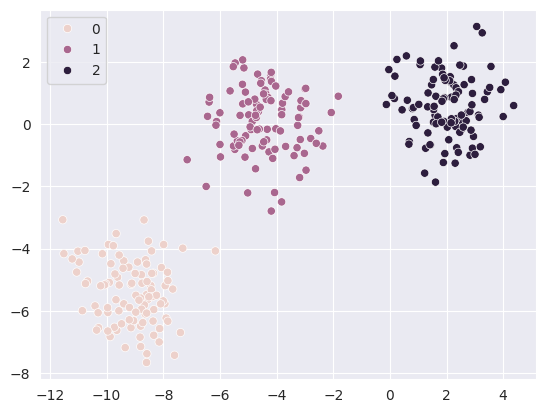

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

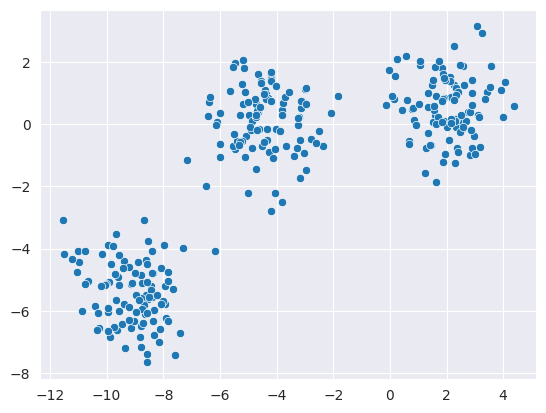

In [ ]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.show()

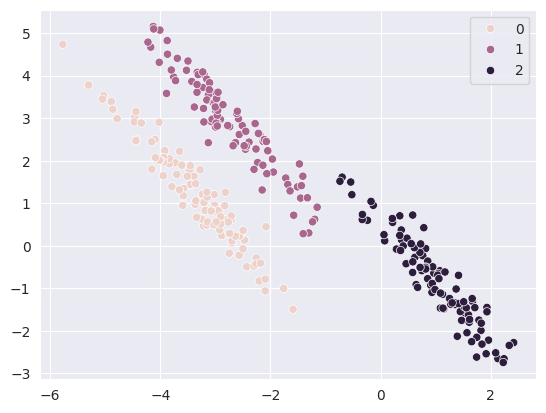

In [ ]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_aniso = y

sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_aniso)
plt.show()

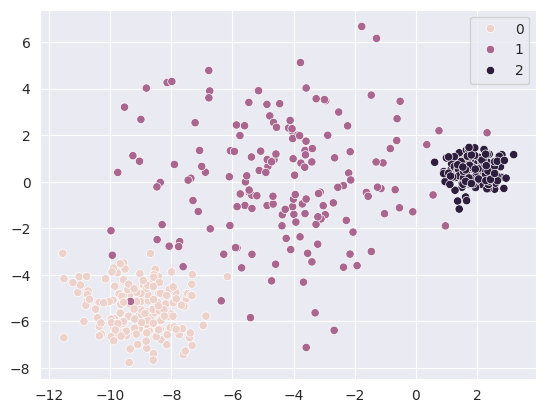

In [ ]:
# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

sns.scatterplot(x=X_varied[:, 0], y=X_varied[:, 1], hue=y_varied)
plt.show()

**Існує два основні типи кластеризації:**

- *Жорстка кластеризація (Hard Clustering)*: Кожен об'єкт однозначно належить лише до одного кластера.
Приклад: Розподіл студентів університету на групи за обраними спеціальностями - кожен студент навчається лише на одній спеціальності.
- *М'яка кластеризація (Soft Clustering)*: Для кожного об'єкта визначається ймовірність або ступінь приналежності до кожного з кластерів.
Приклад: Класифікація фільмів за жанрами - фільм може одночасно належати до кількох жанрів з різною ймовірністю (наприклад, комедія, драма, романтика).

**Основні типи алгоритмів:**
- **Методи розбиття (на основі центроїдів)**:
 - Принцип роботи: Дані розбиваються на кластери шляхом мінімізації відстані між точками даних та центроїдами кластерів.
 - Приклад:
   - K-means: Найпопулярніший алгоритм, що ітерує між присвоєнням точок до кластерів та оновленням центроїдів до збіжності.
- **Методи на основі щільності**:
 - Принцип роботи: Кластери визначаються як області підвищеної щільності точок даних, розділені областями низької щільності.
 - Приклад:
   - DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Ефективний для виявлення кластерів довільної форми та розміру, стійкий до шуму та викидів.
- **Інші**.

## K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means_algo = KMeans(n_clusters=3, random_state=170)

In [ ]:
k_means_algo.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=170)

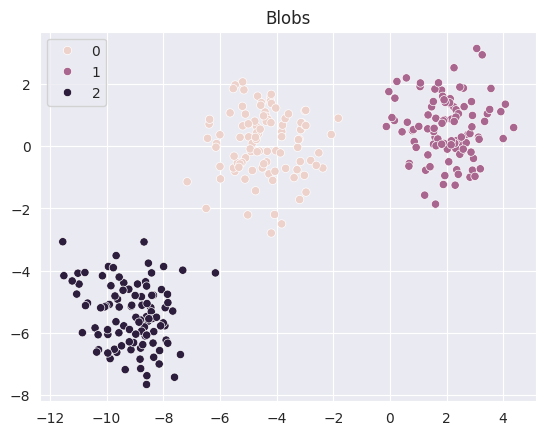

In [ ]:
y_pred = k_means_algo.predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
plt.title("Blobs")
plt.show()

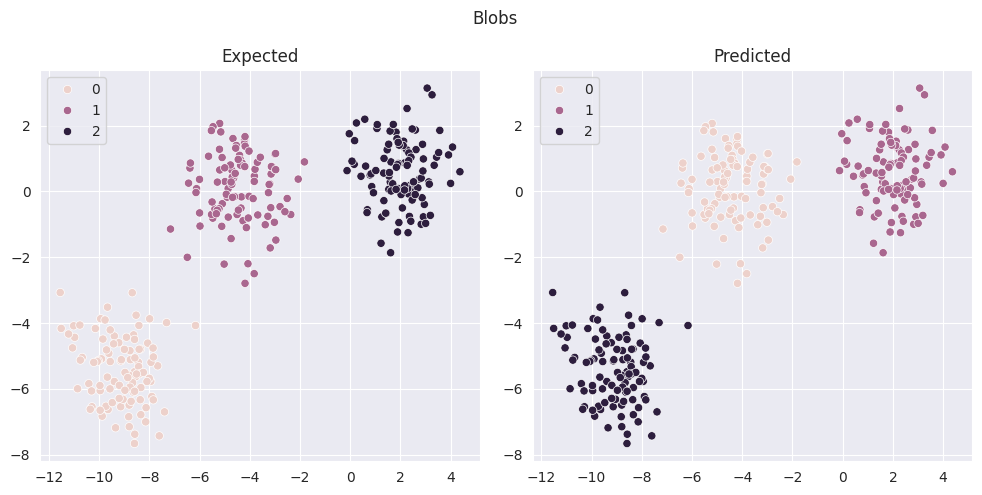

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax1)
ax1.set_title("Expected")

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, ax=ax2)
ax2.set_title("Predicted")

plt.suptitle("Blobs")
plt.tight_layout()
plt.show()

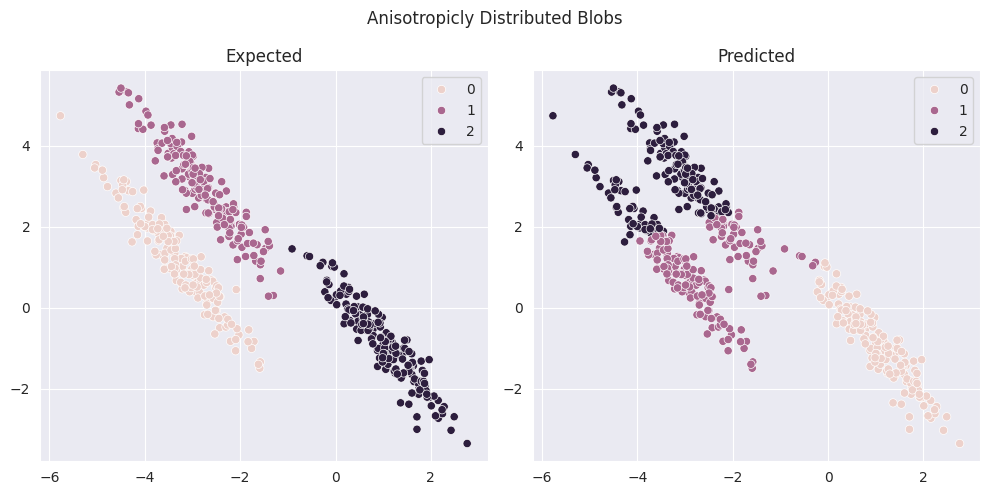

In [ ]:
y_pred_aniso = KMeans(n_clusters=3, random_state=170).fit_predict(X_aniso)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Expected
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_aniso, ax=ax1)
ax1.set_title("Expected")

# Predicted
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_pred_aniso, ax=ax2)
ax2.set_title("Predicted")

plt.suptitle("Anisotropicly Distributed Blobs")
plt.tight_layout()
plt.show()

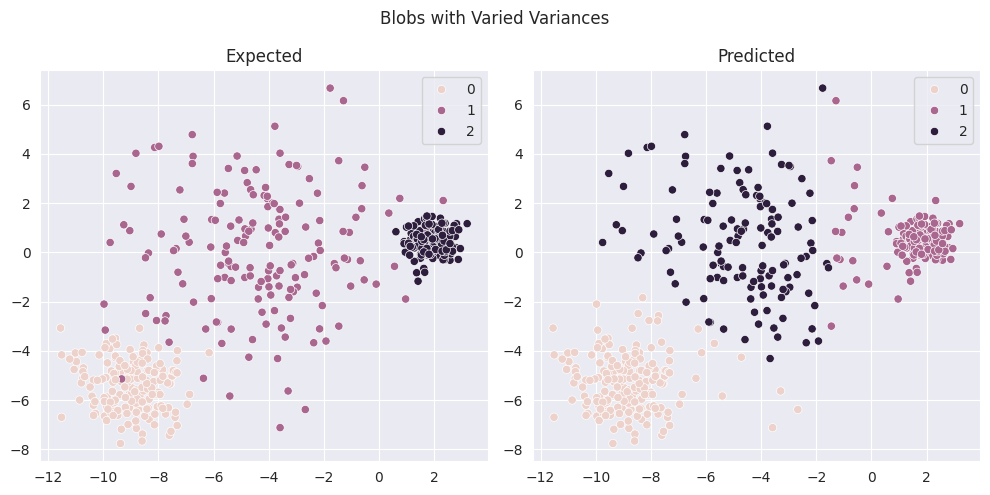

In [ ]:
y_pred_varied = KMeans(n_clusters=3, random_state=170).fit_predict(X_varied)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Expected
sns.scatterplot(x=X_varied[:, 0], y=X_varied[:, 1], hue=y_varied, ax=ax1)
ax1.set_title("Expected")

# Predicted
sns.scatterplot(x=X_varied[:, 0], y=X_varied[:, 1], hue=y_pred_varied, ax=ax2)
ax2.set_title("Predicted")

plt.suptitle("Blobs with Varied Variances")
plt.tight_layout()
plt.show()

### [Introduction to K-Means Clustering](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/)

Алгоритм K-Means - це популярний метод кластеризації, який дозволяє розділити набір даних на K кластерів, де кожна точка даних належить до кластера з найближчим до неї центром (центроїдом).

**Мета алгоритму K-середніх:**

Головна мета алгоритму K-Means - розбити дані на K груп (кластерів) таким чином, щоб:

- Точки даних в межах одного кластера були максимально схожими: Це досягається шляхом мінімізації сумарної відстані між точками даних та центроїдом їх кластера.
- Точки даних з різних кластерів були максимально відмінними: Тобто максимізувати відстань між центроїдами різних кластерів.

**Етапи роботи алгоритму:**

1. **Ініціалізація**: Випадковим чином обираються K точок з набору даних. Ці точки стають початковими центроїдами кластерів.
2. **Присвоєння точок даних**: Для кожної точки даних обчислюється відстань до кожного з K центроїдів. Точка даних присвоюється до кластера, центроїд якого є найближчим.
3. **Оновлення центроїдів**: Після того, як всі точки даних було присвоєно до кластерів, центроїди кластерів перераховуються. Новий центроїд обчислюється як середнє арифметичне координат усіх точок даних, що належать до цього кластера.
4. **Повторення**: Кроки 2 та 3 повторюються ітеративно до досягнення збіжності. Збіжність означає, що центроїди кластерів більше не змінюються суттєво, або було досягнуто заданої кількості ітерацій.

Алгоритм K-середніх ітерує між присвоєнням точок даних до кластерів та оновленням центроїдів, прагнучи знайти таке розташування центроїдів, яке мінімізує сумарну відстань від кожної точки даних до центроїда її кластера.

In [ ]:
# create a meshgrid to plot the decision boundaries
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
)

# predict the clusters for each point in the meshgrid
k_means_algo = KMeans(n_clusters=3, random_state=170)
k_means_algo.fit(X)
grid_pred = k_means_algo.predict(np.c_[xx.ravel(), yy.ravel()])
grid_pred = grid_pred.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


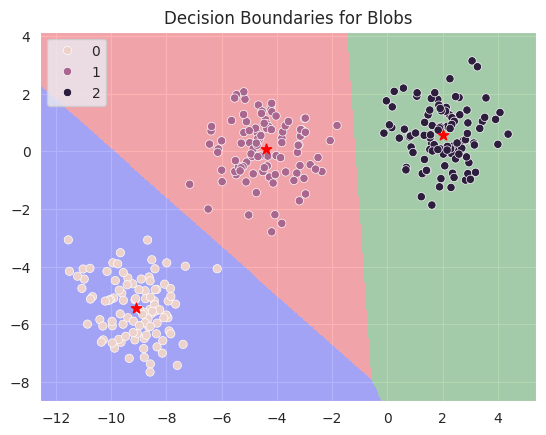

In [ ]:
from matplotlib.colors import ListedColormap

# plot the decision boundaries
plt.pcolormesh(xx, yy, grid_pred, cmap=ListedColormap(["r", "g", "b"]), alpha=0.3)

# plot the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

# plot the centroids
centroids_x = k_means_algo.cluster_centers_[:, 0]
centroids_y = k_means_algo.cluster_centers_[:, 1]

plt.scatter(centroids_x, centroids_y, marker="*", s=60, color="red")

plt.title("Decision Boundaries for Blobs")
plt.show()

### Elbow Method

**Метод ліктя** - це графічний підхід для визначення оптимальної кількості кластерів (значення K) в алгоритмі K-середніх. Він базується на аналізі суми квадратів відстаней всередині кластерів (WCSS) - міри компактності кластерів.

Принцип роботи:
1. Варіювання кількості кластерів: Алгоритм K-середніх запускається для різних значень K (наприклад, від 1 до 10).
2. Обчислення WCSS: Для кожного значення K розраховується WCSS - сума квадратів відстаней між кожною точкою даних та центроїдом її кластера.
3. Побудова графіка: Будується графік залежності WCSS від K.
4. Пошук "ліктя": На графіку шукається точка, де відбувається різкий спад (злам) кривої, що нагадує форму ліктя. Значення K, що відповідає цій точці, вважається оптимальним.

In [ ]:
elbow_range = range(1, 11)
distortions = []
for k in elbow_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)

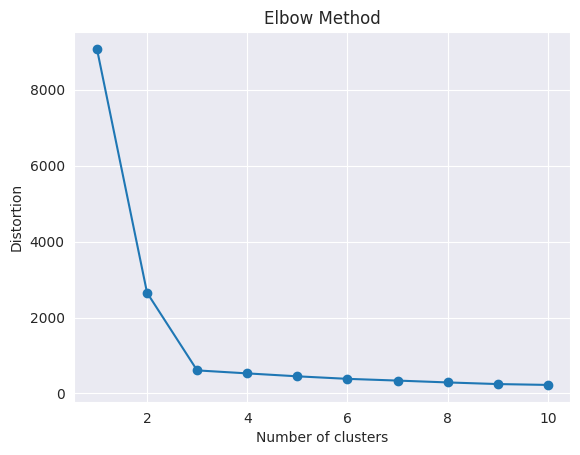

In [ ]:
plt.plot(elbow_range, distortions, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.title("Elbow Method")
plt.show()

**Пояснення:**

- При K=1 всі точки даних належать до одного кластера, тому WCSS максимальна.
- Зі збільшенням K WCSS зменшується, оскільки точки даних розподіляються по більшій кількості кластерів, що робить кластери компактнішими.
- Однак, починаючи з певного значення K, зменшення WCSS сповільнюється, і графік стає майже паралельним до осі X. Це означає, що подальше збільшення кількості кластерів не призводить до значного покращення компактності кластерів.

## [Comparing Different Clustering Algorithms](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

### DBSCAN

**DBSCAN** - це метод кластеризації на основі щільності, який широко застосовується в машинному навчанні та аналізі даних. На відміну від алгоритму K-середніх, який припускає, що кластери мають сферичну форму, DBSCAN може ідентифікувати кластери довільної форми та розміру.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) шукає області з підвищеною щільністю точок даних, розділені областями з низькою щільністю.

Принцип роботи:
1. Вибір точки: Випадковим чином обирається невідвідана точка даних.
2. Пошук сусідів: Визначаються всі точки, що знаходяться в межах заданого радіуса (eps) від обраної точки.
3. Формування кластера:
 - Якщо кількість точок в межах радіуса eps дорівнює або перевищує мінімальну кількість точок для формування кластера (minPts), обрана точка позначається як основна точка кластера, і формується новий кластер.
 - В іншому разі обрана точка позначається як шумова.
4. Розширення кластера: Для кожної точки-сусіда основної точки рекурсивно повторюються кроки 2-3, розширюючи кластер, доки не будуть відвідані всі точки з достатньою щільністю.
5. Повторення: Кроки 1-4 повторюються для всіх невідвіданих точок даних.

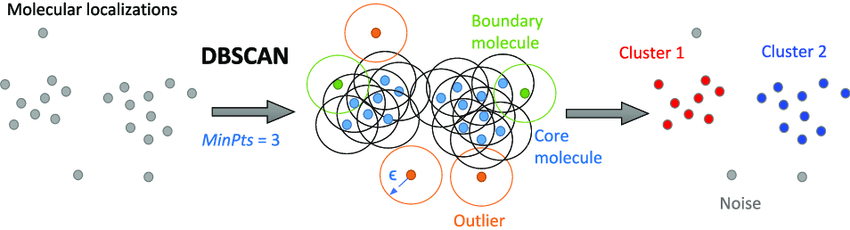

In [ ]:
from sklearn.cluster import DBSCAN

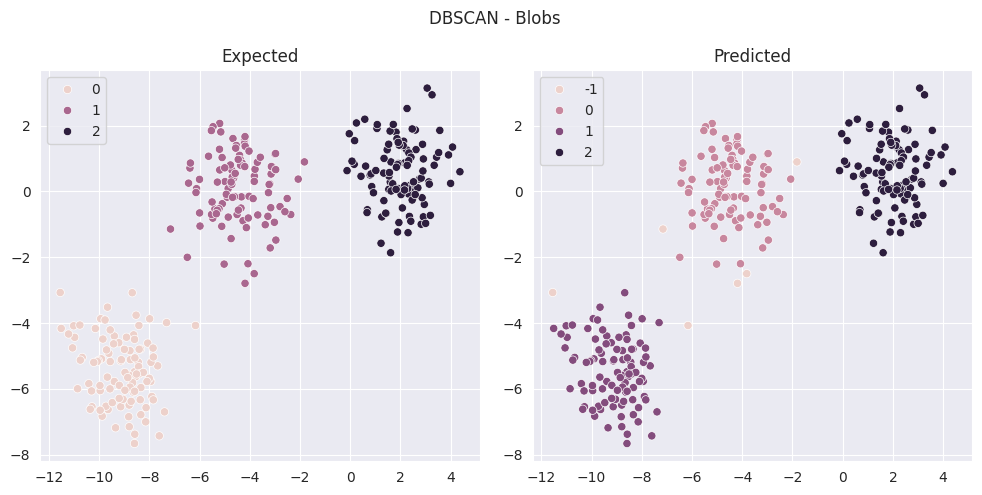

In [ ]:
y_pred = DBSCAN(eps=1.1, min_samples=10).fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Expected
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax1)
ax1.set_title("Expected")

# Predicted
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, ax=ax2)
ax2.set_title("Predicted")

plt.suptitle("DBSCAN - Blobs")
plt.tight_layout()
plt.show()

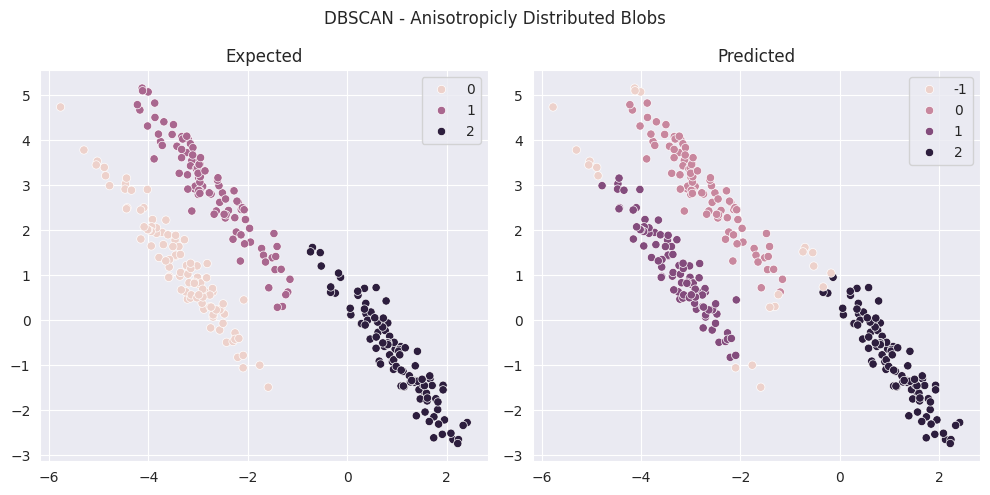

In [ ]:
y_pred_aniso = DBSCAN(eps=0.54, min_samples=10).fit_predict(X_aniso)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Expected
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_aniso, ax=ax1)
ax1.set_title("Expected")

# Predicted
sns.scatterplot(x=X_aniso[:, 0], y=X_aniso[:, 1], hue=y_pred_aniso, ax=ax2)
ax2.set_title("Predicted")

plt.suptitle("DBSCAN - Anisotropicly Distributed Blobs")
plt.tight_layout()
plt.show()

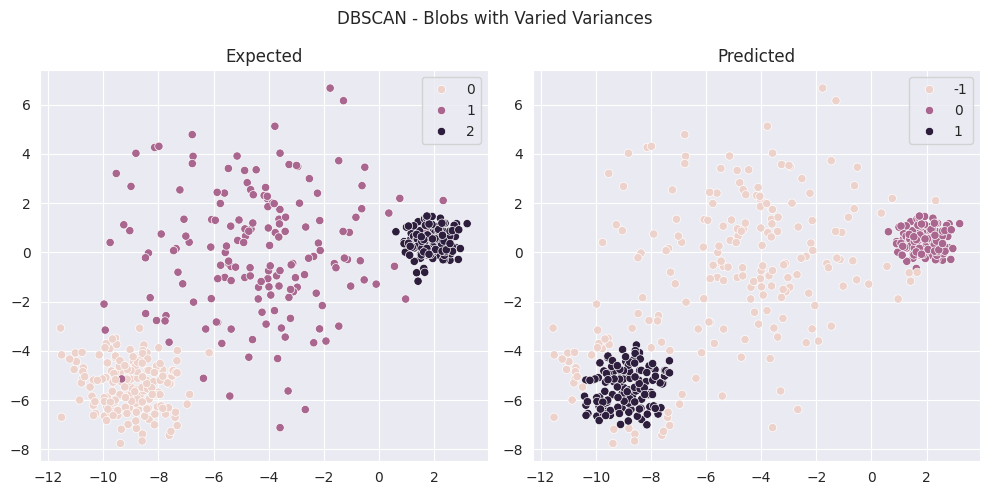

In [ ]:
y_pred_varied = DBSCAN(eps=0.5, min_samples=10).fit_predict(X_varied)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Expected
sns.scatterplot(x=X_varied[:, 0], y=X_varied[:, 1], hue=y_varied, ax=ax1)
ax1.set_title("Expected")

# Predicted
sns.scatterplot(x=X_varied[:, 0], y=X_varied[:, 1], hue=y_pred_varied, ax=ax2)
ax2.set_title("Predicted")

plt.suptitle("DBSCAN - Blobs with Varied Variances")
plt.tight_layout()
plt.show()

**Переваги DBSCAN:**

- Кластери довільної форми: DBSCAN може виявляти кластери довільної форми, на відміну від методів, що базуються на центроїдах.
- Стійкість до шуму: Точки з низькою щільністю позначаються як шум і не впливають на формування кластерів.
- Не вимагає заздалегідь задавати кількість кластерів: DBSCAN автоматично визначає кількість кластерів на основі щільності даних.

**Недоліки DBSCAN:**
- Чутливість до параметрів: Ефективність DBSCAN залежить від правильного вибору параметрів eps та minPts.
- Проблеми з даними різної щільності: DBSCAN може мати труднощі з виявленням кластерів з різною щільністю.

## [Kaggle Dataset](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset/data)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/SOCR-HeightWeight.csv')

In [ ]:
len(df)

25000

In [ ]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


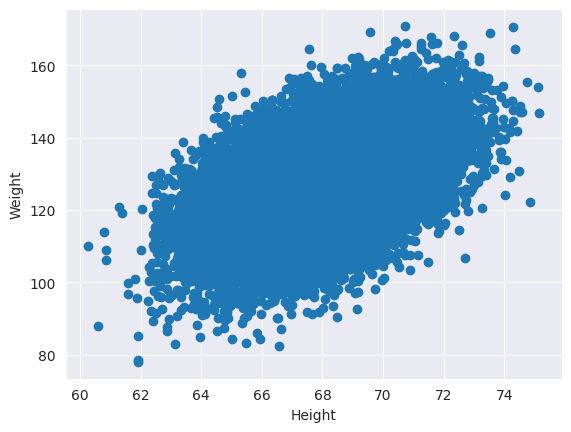

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(df['Height(Inches)'], df['Weight(Pounds)'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
socr_x = df[['Height(Inches)', 'Weight(Pounds)']].to_numpy()
socr_x[:, 0] *= 2.54
socr_x[:, 1] *= 0.453592

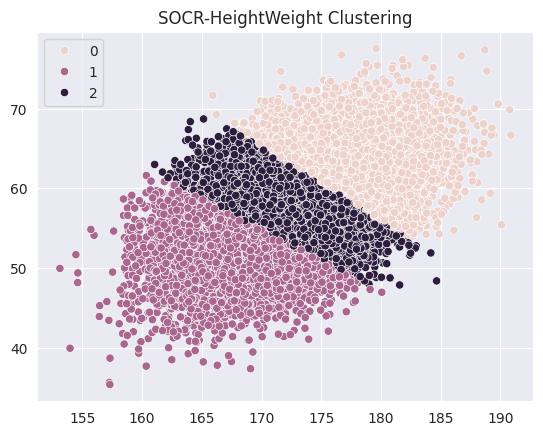

In [ ]:
socr_y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(socr_x)
sns.scatterplot(x=socr_x[:, 0], y=socr_x[:, 1], hue=socr_y_pred)
plt.title("SOCR-HeightWeight Clustering")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
socr_x_normalized = scaler.fit_transform(socr_x)

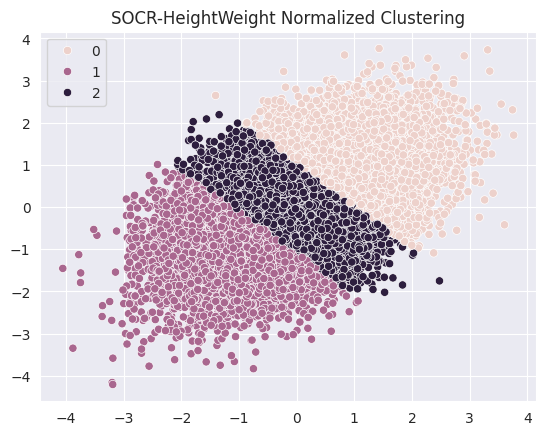

In [ ]:
socr_y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(socr_x_normalized)
sns.scatterplot(x=socr_x_normalized[:, 0], y=socr_x_normalized[:, 1], hue=socr_y_pred)
plt.title("SOCR-HeightWeight Normalized Clustering")
plt.show()

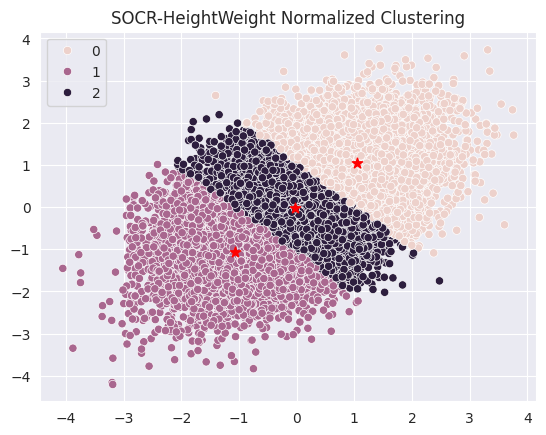

In [ ]:
cloth_k_means = KMeans(n_clusters=3, random_state=170)
socr_y_pred = cloth_k_means.fit_predict(socr_x_normalized)
sns.scatterplot(x=socr_x_normalized[:, 0], y=socr_x_normalized[:, 1], hue=socr_y_pred)

centroids_x = cloth_k_means.cluster_centers_[:, 0]
centroids_y = cloth_k_means.cluster_centers_[:, 1]
plt.scatter(centroids_x, centroids_y, marker='*', s=60, color='r')

plt.title("SOCR-HeightWeight Normalized Clustering")
plt.show()

In [ ]:
scaler.inverse_transform(cloth_k_means.cluster_centers_)

array([[177.78053255,  63.13870354],
       [167.51518973,  51.94342984],
       [172.57579952,  57.55314542]])

In [ ]:
reference_models = scaler.inverse_transform(cloth_k_means.cluster_centers_)
reference_models[:, 0] *= 2.54
reference_models[:, 1] *= 0.453592
reference_models

array([[168.42372931,  57.20686564],
       [179.5854985 ,  63.52793779],
       [173.36604176,  62.01743598],
       [174.66240957,  55.05068649],
       [167.11112015,  50.04748949]])

# Dimensionality Reduction

**Прокляття розмірності**: Проблема, яка виникає при роботі з даними високої розмірності, коли відстань між точками даних збільшується, що ускладнює аналіз даних та роботу алгоритмів машинного навчання.

# PCA

**Аналіз головних компонент (PCA)** - це лінійний метод зменшення розмірності, який використовується для:

- *Стиснення даних*: зменшення обсягу даних, зберігаючи при цьому якомога більше корисної інформації.
- *Візуалізації даних*: відображення багатовимірних даних у просторі меншої розмірності (наприклад, 2D або 3D), що спрощує їх візуальний аналіз.
- *Виділення ознак*: визначення найбільш інформативних ознак (комбінацій вихідних ознак) для подальшого використання в моделях машинного навчання.

**Основна ідея PCA:** знайти нові координатні осі (головні компоненти), які максимально описують дисперсію даних. Ці осі обираються таким чином, щоб:

- Перша головна компонента відповідала напрямку найбільшої дисперсії даних.
- Друга головна компонента була ортогональна до першої та відповідала напрямку наступної за величиною дисперсії даних.
- І так далі, доки не буде вибрано бажану кількість головних компонент.

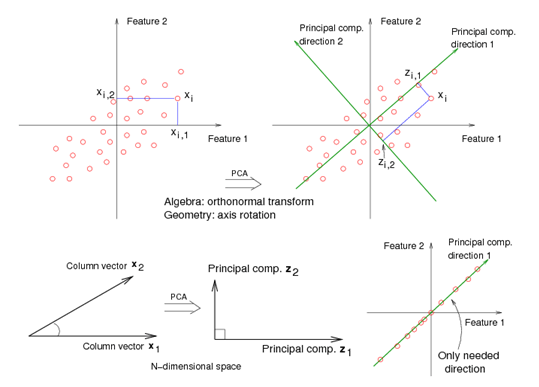

**Алгоритм PCA:**

1. Стандартизація даних: Масштабування кожної ознаки так, щоб вона мала середнє значення 0 та стандартне відхилення 1.
2. Обчислення коваріаційної матриці: Коваріаційна матриця показує, як змінюються ознаки одна відносно одної.
3. Знаходження власних векторів та власних значень коваріаційної матриці:
 - Власні вектори визначають напрямки головних компонент.
  - Власні значення показують величину дисперсії даних вздовж відповідних власних векторів (головних компонент).
4. Сортування власних значень (та відповідних їм власних векторів) за спаданням: Власні вектори, що відповідають більшим власним значенням, представляють більш інформативні головні компоненти.
5. Вибір головних компонент: Визначте кількість головних компонент, які потрібно зберегти, виходячи з бажаного рівня стиснення даних або поясненої дисперсії.
6. Проектування даних на підпростір головних компонент: Помножте матрицю стандартизованих даних на матрицю обраних власних векторів, щоб отримати дані в новому просторі зменшеної розмірності.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Завантаження даних "іриси"
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# 1. Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

[Why PCA need standardization or normalization?
](https://datascience.stackexchange.com/questions/86448/principal-components-analysis-need-standardization-or-normalization)

> Purpose of PCA is to find directions that maximizes the variance. If variance of one variable is higher than others we make the pca components biased in that direction.

> So, best thing to do is make the variance of all variables the same. One way of doing this is by standardizing all the variables.

> Normalization does not make all variables to have the same variance.



In [ ]:
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
num_components = 2

# 2. Обчислення коваріаційної матриці
covariance_matrix = np.cov(X_scaled.T)

# 3. Знаходження власних векторів та власних значень
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 4. Сортування власних значень та власних векторів
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 5. Вибір головних компонент
eigenvectors_subset = sorted_eigenvectors[:, :num_components]

# 6. Проектування даних на підпростір головних компонент
X_reduced = np.dot(X_scaled, eigenvectors_subset)

In [ ]:
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

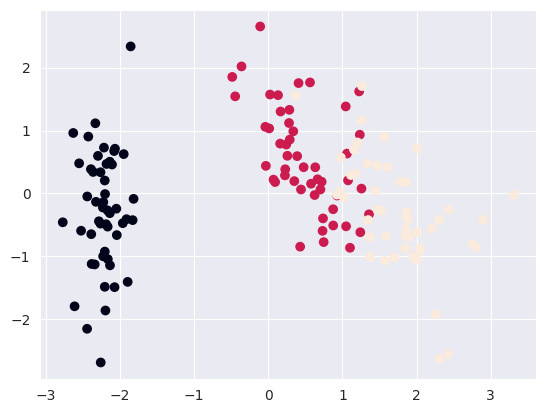

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

In [ ]:
# 2. Створення об'єкта PCA та зменшення розмірності до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

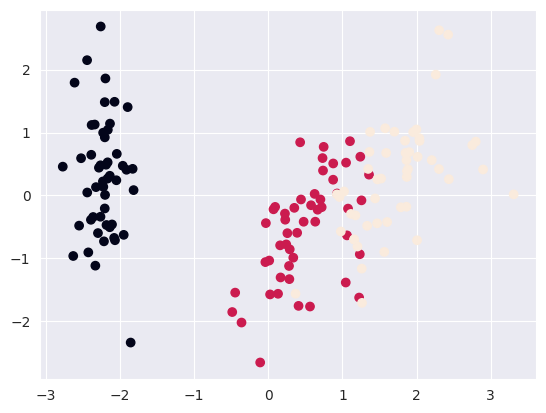

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

***explained_variance_ratio_***

Percentage of variance explained by each of the selected components.

If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9948212908928452

In [ ]:
explained_variance = pca.explained_variance_ratio_
compression_loss = 1 - explained_variance.sum()

print("Втрата стиснення:", compression_loss)

Втрата стиснення: 0.005178709107154789


In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

### Train with reduced dimensions

In [ ]:
from sklearn.svm import SVC

# Створення та навчання моделі SVM
svm = SVC()
svm.fit(X_pca, y)
svm.score(X_pca, y)

0.9733333333333334

**Переваги PCA:**
- Усуває корельовані ознаки: Після застосування PCA всі головні компоненти стають незалежними одна від одної, без кореляції між ними.
- Зменшує перенавчання: Перенавчання часто виникає при великій кількості змінних у наборі даних. PCA допомагає уникнути перенавчання, зменшуючи кількість ознак.
- Спрощує візуалізацію: Візуалізувати та зрозуміти дані високої розмірності складно. PCA перетворює дані високої розмірності на дані низької розмірності (2D або 3D), що спрощує їх візуалізацію.

**Обмеження PCA:**
- Не підходить для розріджених даних: Для розріджених даних краще використовувати SVD (сингулярне розкладання).
- Неефективний для повністю некорельованих ознак: Якщо ознаки повністю некорельовані, представлення низької розмірності, отримане за допомогою PCA, не збереже значну частину дисперсії вихідних даних і буде марним. PCA добре працює, якщо підмножина ознак корельована. Перед застосуванням PCA варто спробувати видалити викиди.
- Припускає ортогональність головних компонент: Головні компоненти в PCA вважаються ортогональними (незалежними) одна від одної.
- Неінтерпретовані нові ознаки: Оскільки PCA - це техніка виділення ознак, нові сформовані ознаки не мають очевидного змісту, тобто не піддаються безпосередній інтерпретації.
- Неефективний для певних типів даних: PCA погано працює на наборах даних з певними розподілами даних (наприклад, **нелінійно роздільні дані**).

### [Deeper dive into PCA](https://medium.com/@ashwin8april/dimensionality-reduction-and-visualization-using-pca-principal-component-analysis-8489b46c2ae0)